# Customer Segmentation (AzMarket)
**Objective:**
Use clustering techniques (e.g., KMeans) to segment customers by their purchasing behavior.

# Load and analyze the data

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('OnlineRetail.csv')

In [117]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [118]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [120]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [121]:
df.shape

(541909, 8)

In [122]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], shape=(4224,), dtype=object)

In [123]:
df['Description'].nunique()

4223

## Simulate the data for Azerbaijan

In [124]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Now, we simulate this data for Azerbaijan based on its structure.

In [125]:
import random
from datetime import datetime, timedelta

n_transactions = 20000
n_customers = 1500

products = {
    "Food & Groceries": [
        ("Azərçay Qara Çay 100 q", 3.5),
        ("Qənd 1 kq", 2.2),
        ("Pendir Motal 500 q", 7.5),
        ("Kərə yağı President 200 q", 8.9),
        ("Yumurta 10 ədəd", 3.0),
        ("Qəhvə Jacobs Monarch 100 q", 9.8),
        ("Çərəz Fındıq 200 q", 5.6),
        ("Nar 1 kq", 4.0),
        ("Alma Golden 1 kq", 2.8),
        ("Lavaş 5 ədəd", 1.5)
    ],
    "Cosmetics & Personal Care": [
        ("Şampun Head & Shoulders 400 ml", 7.2),
        ("Diş pastası Colgate", 3.0),
        ("Dəri kremi Nivea 250 ml", 8.5),
        ("Ətir Versace Eros 100 ml", 145.0),
        ("Maska üz üçün Garnier", 4.0),
        ("Dezodorant Rexona Women", 5.2),
        ("Sabun Palmolive 90 q", 2.0)
    ],
    "Electronics": [
        ("Mobil telefon Samsung Galaxy A55", 1299.0),
        ("Televizor LG Smart TV 55 inch", 1899.0),
        ("Qulaqlıq Apple AirPods Pro", 479.0),
        ("Noutbuk ASUS VivoBook 15", 1450.0),
        ("Tozsoran Philips PowerPro", 349.0),
        ("Fen Rowenta", 79.0),
        ("Paltaryuyan Beko 7kg", 650.0)
    ],
    "Clothing & Accessories": [
        ("Köynək kişi üçün LC Waikiki", 39.0),
        ("Cins şalvar qadın üçün", 59.0),
        ("Ayaqqabı Nike Air Force 1", 199.0),
        ("Saat Casio MTP", 149.0),
        ("Çanta Guess", 220.0),
        ("Şərf dəsti", 25.0),
        ("Uşaq geyimi Disney", 49.0)
    ],
    "Home & Cleaning": [
        ("Yumşaldıcı Lenor 2L", 6.5),
        ("Toz Ariel 3kg", 10.5),
        ("Mətbəx dəsmalı Familia", 2.8),
        ("Şam Glade", 3.9),
        ("Tava Tefal", 45.0),
        ("Süfrə kağızı 2 qat", 1.9)
    ],
    "Health & Pharmacy": [
        ("Vitamin C Solgar 100 ədəd", 35.0),
        ("Termometr Omron", 28.0),
        ("Qoruyucu maska 50 ədəd", 7.0),
        ("Əl dezinfektanı Dettol 250 ml", 5.5),
        ("Burun spreyi Otrivin", 6.5)
    ]
}

product_list = []
for category, items in products.items():
    for desc, price in items:
        product_list.append({
            "StockCode": f"P{len(product_list)+1:05d}",
            "Description": desc,
            "Category": category,
            "UnitPrice": price
        })

products_df = pd.DataFrame(product_list)

invoice_numbers = [f"INV{100000+i}" for i in range(n_transactions)]
customers = [f"CUST{1000+i}" for i in range(n_customers)]


start_date = datetime(2025, 4, 1)
invoice_dates = [
    start_date + timedelta(days=random.randint(0, 180), minutes=random.randint(0, 1440))
    for _ in range(n_transactions)
]

df = pd.DataFrame({
    "InvoiceNo": np.random.choice(invoice_numbers, n_transactions, replace=False),
    "CustomerID": np.random.choice(customers, n_transactions),
    "InvoiceDate": invoice_dates,
    "Quantity": np.random.randint(1, 10, n_transactions),
    "Country": ["Azerbaijan"] * n_transactions
})


df = df.join(products_df.sample(n=n_transactions, replace=True).reset_index(drop=True))

df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

df = df.sort_values("InvoiceDate").reset_index(drop=True)

df.head()


,InvoiceNo,CustomerID,InvoiceDate,Quantity,Country,StockCode,Description,Category,UnitPrice,TotalPrice
0,INV116038,CUST2300,2025-04-01 00:22:00,6,Azerbaijan,P00003,Pendir Motal 500 q,Food & Groceries,7.5,45.0
1,INV108359,CUST2443,2025-04-01 00:32:00,7,Azerbaijan,P00021,Noutbuk ASUS VivoBook 15,Electronics,1450.0,10150.0
2,INV107437,CUST1238,2025-04-01 00:39:00,6,Azerbaijan,P00007,Çərəz Fındıq 200 q,Food & Groceries,5.6,33.6
3,INV102156,CUST2004,2025-04-01 00:45:00,6,Azerbaijan,P00015,Maska üz üçün Garnier,Cosmetics & Personal Care,4.0,24.0
4,INV116211,CUST1246,2025-04-01 00:47:00,7,Azerbaijan,P00037,Süfrə kağızı 2 qat,Home & Cleaning,1.9,13.3


In [126]:
df.shape

(20000, 10)

In [127]:
df['CustomerID'].nunique()

1500

In [128]:
df.isnull().sum()

InvoiceNo      0
CustomerID     0
InvoiceDate    0
Quantity       0
Country        0
StockCode      0
Description    0
Category       0
UnitPrice      0
TotalPrice     0
dtype: int64

## Calculate RFM (Recency, Frequency, Monetary) metrics

**Define a reference date.** This will be the “analysis date” — typically the day after the last transaction.

In [129]:
analysis_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
analysis_date

Timestamp('2025-09-29 23:31:00')

**Calculate RFM metrics.**

In [130]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (analysis_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                   # Frequency
    "TotalPrice": "sum"                                       # Monetary
}).reset_index()

rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalPrice": "Monetary"
}, inplace=True)

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,CUST1000,6,18,5890.3
1,CUST1001,3,15,15471.6
2,CUST1002,18,10,22448.8
3,CUST1003,20,12,1569.4
4,CUST1004,7,11,9162.3


**Assign RFM scores (1–5 scale).** We’ll rank each metric into 5 groups (5 = best, 1 = worst).

In [131]:
rfm["R_rank"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm["F_rank"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["M_rank"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

rfm["RFM_Score"] = rfm["R_rank"].astype(str) + rfm["F_rank"].astype(str) + rfm["M_rank"].astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score
0,CUST1000,6,18,5890.3,4,5,2,452
1,CUST1001,3,15,15471.6,5,4,4,544
2,CUST1002,18,10,22448.8,2,1,5,215
3,CUST1003,20,12,1569.4,2,2,1,221
4,CUST1004,7,11,9162.3,4,2,3,423


## Normalize the data

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
df.head()

,InvoiceNo,CustomerID,InvoiceDate,Quantity,Country,StockCode,Description,Category,UnitPrice,TotalPrice
0,INV116038,CUST2300,2025-04-01 00:22:00,6,Azerbaijan,P00003,Pendir Motal 500 q,Food & Groceries,7.5,45.0
1,INV108359,CUST2443,2025-04-01 00:32:00,7,Azerbaijan,P00021,Noutbuk ASUS VivoBook 15,Electronics,1450.0,10150.0
2,INV107437,CUST1238,2025-04-01 00:39:00,6,Azerbaijan,P00007,Çərəz Fındıq 200 q,Food & Groceries,5.6,33.6
3,INV102156,CUST2004,2025-04-01 00:45:00,6,Azerbaijan,P00015,Maska üz üçün Garnier,Cosmetics & Personal Care,4.0,24.0
4,INV116211,CUST1246,2025-04-01 00:47:00,7,Azerbaijan,P00037,Süfrə kağızı 2 qat,Home & Cleaning,1.9,13.3


In [134]:
scaler = MinMaxScaler()

df[['Quantity','UnitPrice','TotalPrice']] = scaler.fit_transform(df[['Quantity','UnitPrice','TotalPrice']])

In [135]:
df.head()

,InvoiceNo,CustomerID,InvoiceDate,Quantity,Country,StockCode,Description,Category,UnitPrice,TotalPrice
0,INV116038,CUST2300,2025-04-01 00:22:00,0.625,Azerbaijan,P00003,Pendir Motal 500 q,Food & Groceries,0.003162,0.002545
1,INV108359,CUST2443,2025-04-01 00:32:00,0.750,Azerbaijan,P00021,Noutbuk ASUS VivoBook 15,Electronics,0.763373,0.593844
2,INV107437,CUST1238,2025-04-01 00:39:00,0.625,Azerbaijan,P00007,Çərəz Fındıq 200 q,Food & Groceries,0.002161,0.001878
3,INV102156,CUST2004,2025-04-01 00:45:00,0.625,Azerbaijan,P00015,Maska üz üçün Garnier,Cosmetics & Personal Care,0.001318,0.001317
4,INV116211,CUST1246,2025-04-01 00:47:00,0.750,Azerbaijan,P00037,Süfrə kağızı 2 qat,Home & Cleaning,0.000211,0.000690


## Encoding categorical variables

In [136]:
df.head()

,InvoiceNo,CustomerID,InvoiceDate,Quantity,Country,StockCode,Description,Category,UnitPrice,TotalPrice
0,INV116038,CUST2300,2025-04-01 00:22:00,0.625,Azerbaijan,P00003,Pendir Motal 500 q,Food & Groceries,0.003162,0.002545
1,INV108359,CUST2443,2025-04-01 00:32:00,0.750,Azerbaijan,P00021,Noutbuk ASUS VivoBook 15,Electronics,0.763373,0.593844
2,INV107437,CUST1238,2025-04-01 00:39:00,0.625,Azerbaijan,P00007,Çərəz Fındıq 200 q,Food & Groceries,0.002161,0.001878
3,INV102156,CUST2004,2025-04-01 00:45:00,0.625,Azerbaijan,P00015,Maska üz üçün Garnier,Cosmetics & Personal Care,0.001318,0.001317
4,INV116211,CUST1246,2025-04-01 00:47:00,0.750,Azerbaijan,P00037,Süfrə kağızı 2 qat,Home & Cleaning,0.000211,0.000690


In [137]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['CustomerID', 'Country', 'Category']

encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoded = encoder.fit_transform(df[categorical_cols])

In [138]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['CustomerID', 'Country', 'Category']))

In [139]:
encoded_df

,CustomerID_CUST1001,CustomerID_CUST1002,CustomerID_CUST1003,CustomerID_CUST1004,CustomerID_CUST1005,CustomerID_CUST1006,CustomerID_CUST1007,CustomerID_CUST1008,CustomerID_CUST1009,CustomerID_CUST1010,...,CustomerID_CUST2495,CustomerID_CUST2496,CustomerID_CUST2497,CustomerID_CUST2498,CustomerID_CUST2499,Category_Cosmetics & Personal Care,Category_Electronics,Category_Food & Groceries,Category_Health & Pharmacy,Category_Home & Cleaning
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [140]:
final_df = pd.concat([encoded_df, df[['Quantity', 'UnitPrice', 'TotalPrice']].reset_index(drop=True)], axis=1)

## Clustering using Elbow method and K-means.

In [141]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(final_df)

In [142]:
y_kmeans

array([1, 0, 1, ..., 3, 1, 0], shape=(20000,), dtype=int32)

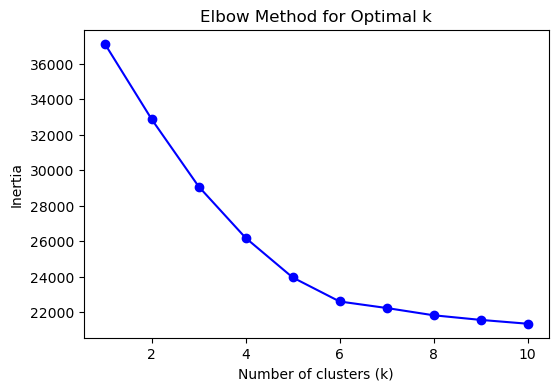

In [143]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_df)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



In [144]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
final_df["Cluster"] = kmeans.fit_predict(final_df)


In [147]:
final_df[["Quantity", "UnitPrice", "TotalPrice"]] = scaler.inverse_transform(final_df[["Quantity", "UnitPrice", "TotalPrice"]])

In [148]:
cluster_labels = {
    0: "Low Spenders",
    1: "Moderate Buyers",
    2: "Premium Buyers",
    3: "Top Customers"
}
final_df["ClusterLabel"] = final_df["Cluster"].map(cluster_labels)

print(final_df.groupby("ClusterLabel")[["Quantity", "UnitPrice", "TotalPrice"]].mean())


                 Quantity   UnitPrice   TotalPrice
ClusterLabel                                      
Low Spenders     4.960296  892.506074  4433.358815
Moderate Buyers  4.972018    4.906375    24.337261
Premium Buyers   5.054871   24.372388   120.693163
Top Customers    5.012878   50.363351   251.786472
